## Automating National Briefings
Author: Smitha Mahesh, Eric Englin, Sophie Son

Purpose: To complete the analyses and visualizations required for the program-level briefings. 

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import docx

In [4]:
myworkingdirectory = r"C:\Users\Sophie.Kaye\DOT OST\volpe-proj-VU16A100 - Transportation Safety Program\Region Briefing"
os.chdir(myworkingdirectory)

In [5]:
analysis_2022 = pd.read_csv(".//Data//Output Data//analysis_database_2022.csv")

In [28]:
analysis_2022.shape

(207097, 53)

In [29]:
imars = analysis_2022.loc[analysis_2022['database']=='IMARS']
cds = analysis_2022.loc[analysis_2022['database']=='CDS']

In [30]:
# the number of park units included in IMARS is:
len(pd.unique(imars['Park']))

224

In [31]:
# the number of park units included in CDS is:
len(pd.unique(cds['Park']))

242

In [32]:
# the number of crash reports missing coordinates (could not be mapped) from cds is:
cds.loc[cds['LATITUDE'].isnull()].shape[0]

165222

In [33]:
# the percent of crash reports missing coordinates (could not be mapped) from cds is:
round(cds.loc[cds['LATITUDE'].isnull()].shape[0]/cds.shape[0]*100,1)

85.0

In [34]:
# the number of crash reports missing coordinates (could not be mapped) from imars is:
imars.loc[imars['LATITUDE'].isnull()].shape[0]

5102

In [35]:
# the percent of crash reports missing coordinates (could not be mapped) from imars is:
round(imars.loc[imars['LATITUDE'].isnull()].shape[0]/imars.shape[0]*100,1)

39.9

In [36]:
# for a total of:
165222 + 5102

170324

In [37]:
round(170324/analysis_2022.shape[0]*100,1)

82.2

# National Data Trends 

## Table 1:  Servicewide Fatal and Injury Crash Types (1990-2021, data from STARS, CDS, IMARS) 

### national VRU crash stats 

In [38]:
vru = analysis_2022.loc[analysis_2022['VRU']==1]
vru_inj_or_fatal = vru.loc[vru['Injury or Fatal']==1]
vru_total_crashes = vru.shape[0]
vru_percent = round(vru.shape[0]/analysis_2022.shape[0]*100,2)
vru_injury = int(vru['Num_Injuries'].sum())
vru_serious_injury = int(vru['Incapacitating Injury'].sum())
vru_fatals = int(vru['Num_Fatalities'].sum())
vru_inj_or_fatal_percent = round(vru_inj_or_fatal.shape[0]/vru.shape[0]*100,2)

print(vru_total_crashes,"number of crash reports involving VRUs")
print(vru_percent, "% of total crashes involving VRUs")
print(vru_injury, "total injuries in VRU crashes")
print(vru_serious_injury, "serious injuries in VRU crashes")
print(vru_fatals, "fatalities in VRU crashes")
print(vru_inj_or_fatal_percent, "% of VRU crashes resulting in an injury or fatality")

2824 number of crash reports involving VRUs
1.36 % of total crashes involving VRUs
1281 total injuries in VRU crashes
578 serious injuries in VRU crashes
27 fatalities in VRU crashes
48.23 % of VRU crashes resulting in an injury or fatality


### national wildlife crash stats 

In [39]:
animal = analysis_2022.loc[analysis_2022['Involving Animal']==1]
animal_inj_or_fatal = animal.loc[animal['Injury or Fatal']==1]
animal_total_crashes = animal.shape[0]
animal_percent = round(animal.shape[0]/analysis_2022.shape[0]*100,2)
animal_injury = int(animal['Num_Injuries'].sum())
animal_serious_injury = int(animal['Incapacitating Injury'].sum())
animal_fatals = int(animal['Num_Fatalities'].sum())
animal_inj_or_fatal_percent = round(animal_inj_or_fatal.shape[0]/animal.shape[0]*100,2)

print(animal_total_crashes,"number of crash reports involving wildlife")
print(animal_percent, "% of total crashes involving wildlife")
print(animal_injury, "total injuries in wildlife crashes")
print(animal_serious_injury, "serious injuries in wildlife crashes")
print(animal_fatals, "fatalities in wildlife crashes")
print(animal_inj_or_fatal_percent, "% of wildlife crashes resulting in an injury or fatality")

22924 number of crash reports involving wildlife
11.07 % of total crashes involving wildlife
2864 total injuries in wildlife crashes
400 serious injuries in wildlife crashes
30 fatalities in wildlife crashes
9.63 % of wildlife crashes resulting in an injury or fatality


### total national crash stats 

In [40]:
inj_or_fatal = analysis_2022.loc[analysis_2022['Injury or Fatal']==1]
total_crashes = analysis_2022.shape[0]
total_percent = round(analysis_2022.shape[0]/analysis_2022.shape[0]*100,2)
total_injury = int(analysis_2022['Num_Injuries'].sum())
total_serious_injury = int(analysis_2022['Incapacitating Injury'].sum())
total_fatals = int(analysis_2022['Num_Fatalities'].sum())
inj_or_fatal_percent = round(inj_or_fatal.shape[0]/analysis_2022.shape[0]*100,2)

print("total number of crash reports:", total_crashes)
print("% of total crashes:", total_percent)
print("total number of injuries:", total_injury)
print("total number of serious injuries:", total_serious_injury)
print("total number of fatalities:", total_fatals)
print("% of total crashes resulting in an injury or fatality:", inj_or_fatal_percent)

total number of crash reports: 207097
% of total crashes: 100.0
total number of injuries: 52843
total number of serious injuries: 10987
total number of fatalities: 1260
% of total crashes resulting in an injury or fatality: 17.71


### assemble table

In [41]:
nationaldata= {'Collision Type': ['Crashes Involving VRUs','Crashes Involving Wildlife', 'All Crashes'], 'Number of Crash Reports': [vru_total_crashes, animal_total_crashes, total_crashes], 'Percentage of Total Crashes': [vru_percent, animal_percent, total_percent], 'Number of Injuries':[vru_injury, animal_injury, total_injury], 'Number of Serious Injuries':[vru_serious_injury, animal_serious_injury, total_serious_injury], 'Number of Fatalities':[vru_fatals, animal_fatals, total_fatals], 'Percent of Crashes Resulting in an Injury/Fatality':[vru_inj_or_fatal_percent, animal_inj_or_fatal_percent, inj_or_fatal_percent]}
df5 = pd.DataFrame(nationaldata)
print(df5)

               Collision Type  Number of Crash Reports  \
0      Crashes Involving VRUs                     2824   
1  Crashes Involving Wildlife                    22924   
2                 All Crashes                   207097   

   Percentage of Total Crashes  Number of Injuries  \
0                         1.36                1281   
1                        11.07                2864   
2                       100.00               52843   

   Number of Serious Injuries  Number of Fatalities  \
0                         578                    27   
1                         400                    30   
2                       10987                  1260   

   Percent of Crashes Resulting in an Injury/Fatality  
0                                              48.23   
1                                               9.63   
2                                              17.71   


## Figure 1: All Crashes By Speed Limit

In [42]:
speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
fatalities = []
serious_injuries = []
crashes = []

for i in speed_columns:
    num_fatalities = analysis_2022.loc[analysis_2022[i]==1]['Num_Fatalities'].sum()
    fatalities.append(num_fatalities)
    num_serious_injuries = analysis_2022.loc[analysis_2022[i]==1]['Incapacitating Injury'].sum()
    serious_injuries.append(num_serious_injuries)    
    num_crashes = analysis_2022.loc[analysis_2022[i]==1].shape[0]
    crashes.append(num_crashes)

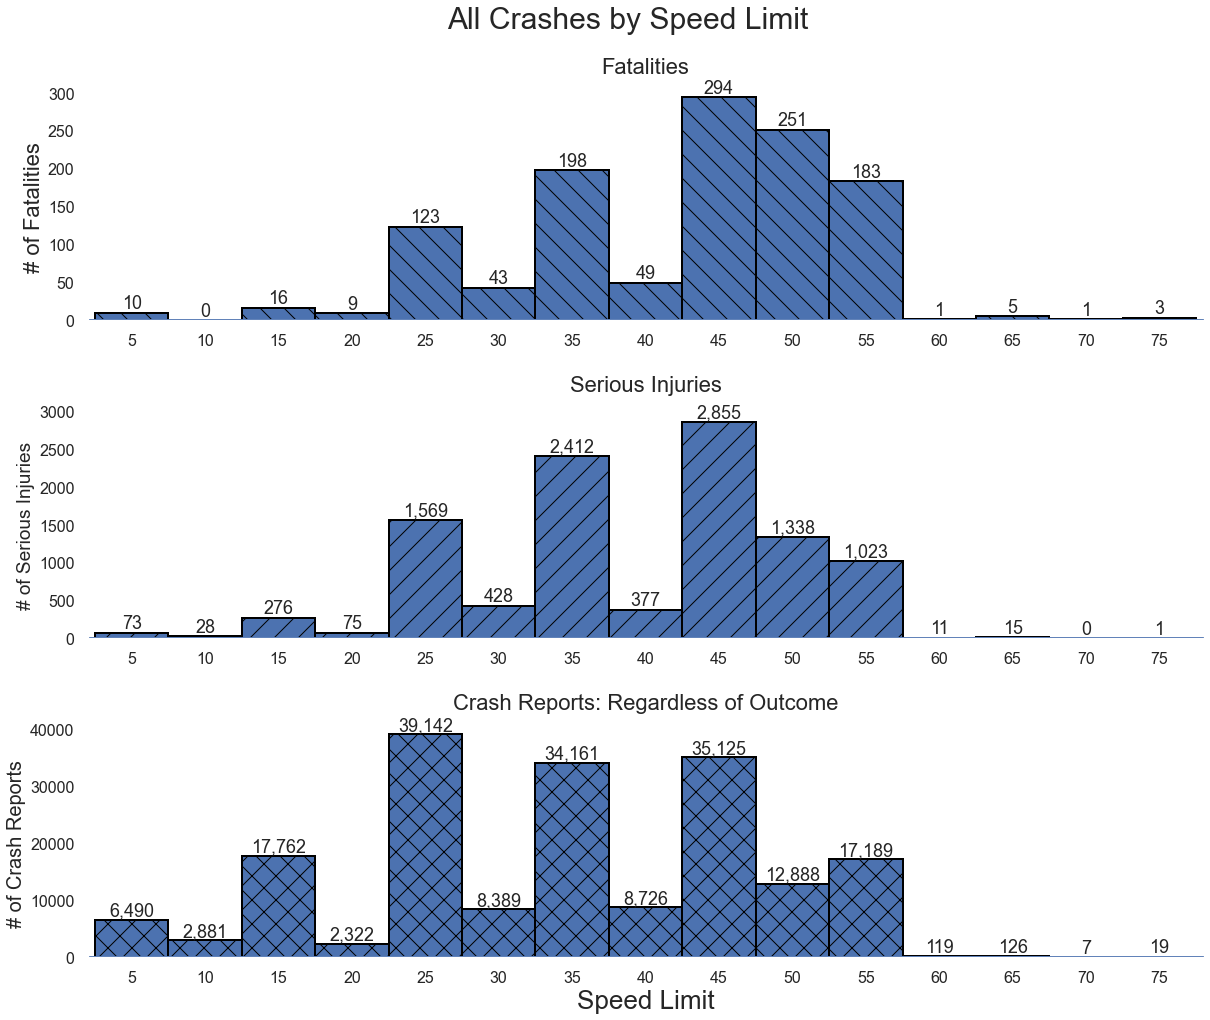

In [43]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5
fig.suptitle('All Crashes by Speed Limit', fontsize=30)

# subplot data
ax[0].bar(speed_list, fatalities, width = 5, hatch = "\\", edgecolor = "black", linewidth=2)
ax[1].bar(speed_list, serious_injuries, width = 5, hatch = "/", edgecolor = "black", linewidth=2)
ax[2].bar(speed_list, crashes, width = 5, hatch = "x", edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 300])
ax[0].set_xlim([2, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 3000])
ax[1].set_xlim([2, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("Crash Reports: Regardless of Outcome",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 40000])
ax[2].set_xlim([2, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Figure 2: Crashes Resulting in an Injury or Fatality

In [44]:
speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
inj_or_fatal = analysis_2022.loc[analysis_2022['Injury or Fatal']==1]
vru_inj_or_fatal = inj_or_fatal.loc[inj_or_fatal['VRU']==1]
animal_inj_or_fatal = inj_or_fatal.loc[inj_or_fatal['Involving Animal']==1]
VRU_crashes = []
wildlife_crashes = []
all_crashes = []

for i in speed_columns:
    num_VRU_crashes = vru_inj_or_fatal.loc[vru_inj_or_fatal[i]==1].shape[0]
    VRU_crashes.append(num_VRU_crashes)
    num_wildlife_crashes = animal_inj_or_fatal.loc[animal_inj_or_fatal[i]==1].shape[0]
    wildlife_crashes.append(num_wildlife_crashes)    
    num_all_crashes = inj_or_fatal.loc[inj_or_fatal[i]==1].shape[0]
    all_crashes.append(num_all_crashes)

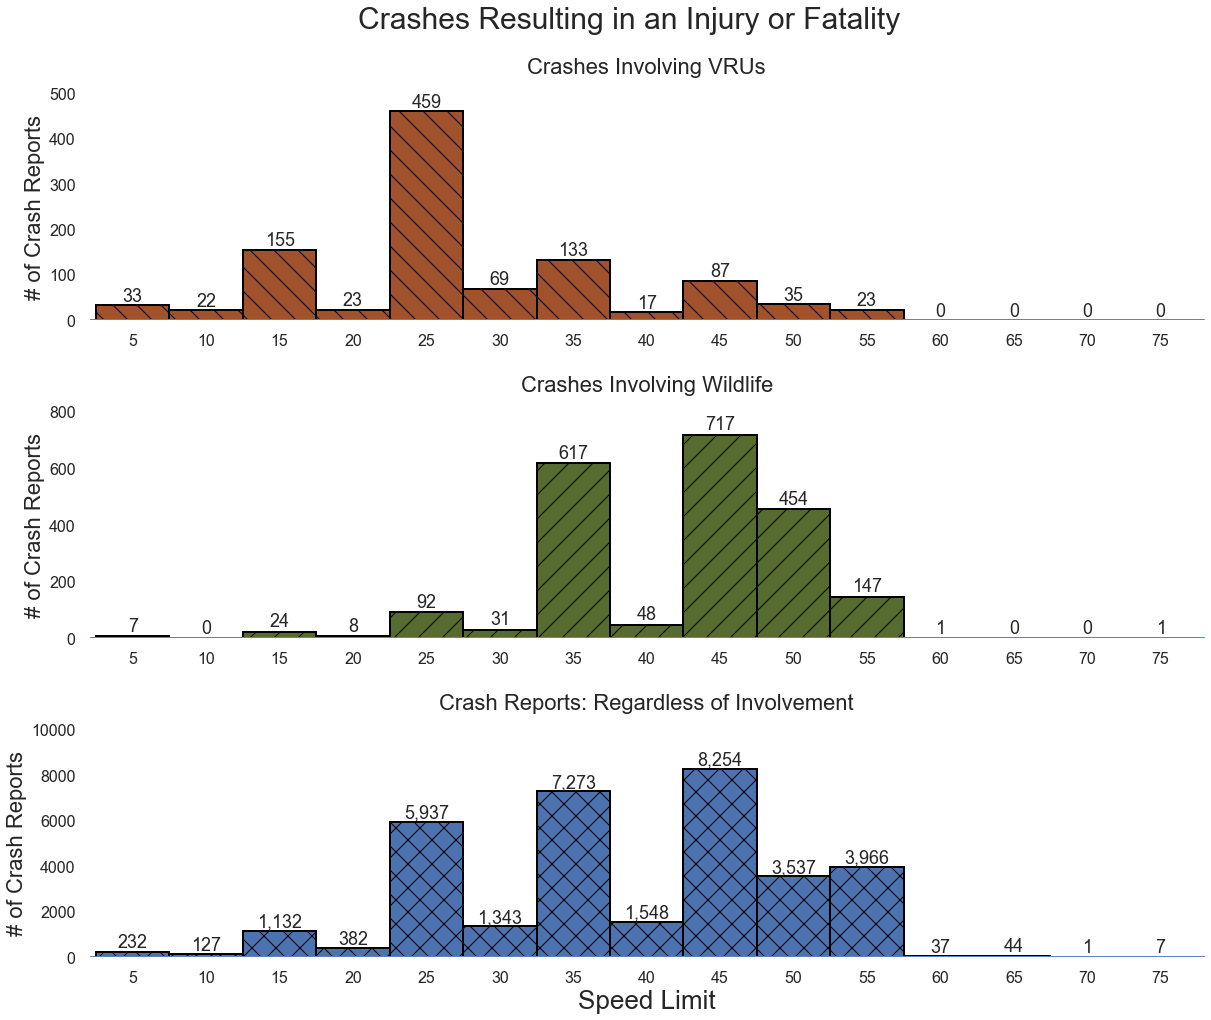

In [45]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5
fig.suptitle('Crashes Resulting in an Injury or Fatality', fontsize=30)

# subplot data
ax[0].bar(speed_list, VRU_crashes, width = 5, hatch = "\\", color = 'sienna', edgecolor = "black", linewidth=2)
ax[1].bar(speed_list, wildlife_crashes, width = 5, hatch = "/", color = 'darkolivegreen', edgecolor = "black", linewidth=2)
ax[2].bar(speed_list, all_crashes, width = 5, hatch = "x", edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Crashes Involving VRUs",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 500])
ax[0].set_xlim([2, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].set_ylabel("# of Crash Reports", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Crashes Involving Wildlife",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 800])
ax[1].set_xlim([2, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("# of Crash Reports", fontsize = 22)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("Crash Reports: Regardless of Involvement",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 10000])
ax[2].set_xlim([2, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 22)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Figure 3: VRU Crashes By Speed Limit

In [46]:
speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
vru = analysis_2022.loc[analysis_2022['VRU']==1]
vru_inj_or_fatal = vru.loc[vru['Injury or Fatal']==1]
vru_fatalities = []
vru_serious_injuries = []
vru_crashes = []

for i in speed_columns:
    num_vru_fatalities = vru.loc[vru[i]==1]['Num_Fatalities'].sum()
    vru_fatalities.append(num_vru_fatalities)
    num_vru_serious_injuries = vru.loc[vru[i]==1]['Incapacitating Injury'].sum()
    vru_serious_injuries.append(num_vru_serious_injuries)    
    num_vru_crashes = vru.loc[vru[i]==1].shape[0]
    #num_vru_crashes = vru_inj_or_fatal.loc[vru_inj_or_fatal[i]==1].shape[0]
    vru_crashes.append(num_vru_crashes)

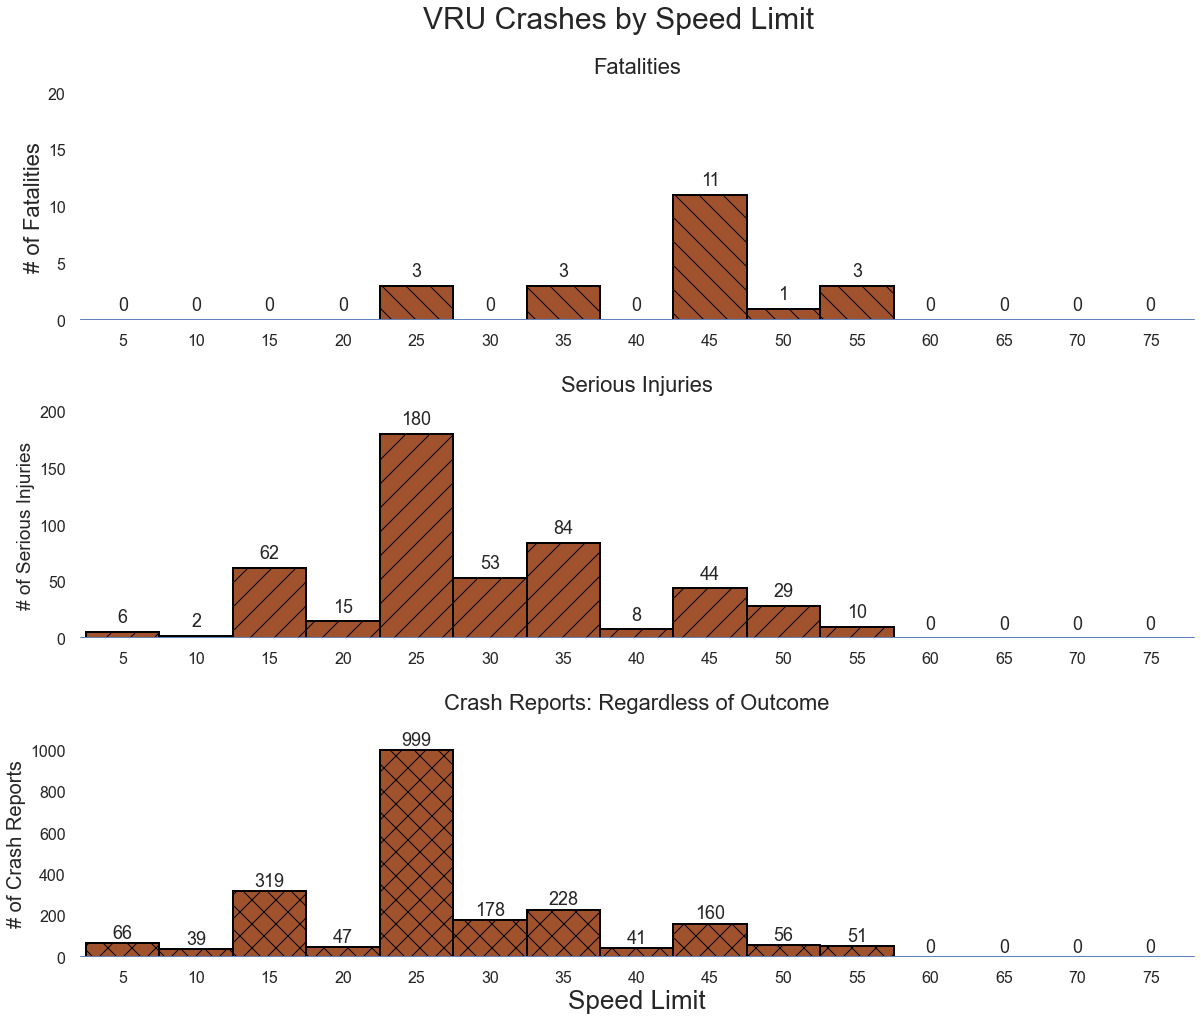

In [47]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5
fig.suptitle('VRU Crashes by Speed Limit', fontsize=30)

# subplot data
ax[0].bar(speed_list, vru_fatalities, width = 5, hatch = "\\", color = 'sienna', edgecolor = "black", linewidth=2)
ax[1].bar(speed_list, vru_serious_injuries, width = 5, hatch = "/", color = 'sienna', edgecolor = "black", linewidth=2)
ax[2].bar(speed_list, vru_crashes, width = 5, hatch = "x", color = 'sienna', edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 20])
ax[0].set_xlim([2, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 200])
ax[1].set_xlim([2, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("Crash Reports: Regardless of Outcome",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 1100])
ax[2].set_xlim([2, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Figure 4: VRU Crashes at Crosswalks

In [48]:
crosswalks = ['Crosswalk','Outside a Crosswalk']
vru = analysis_2022.loc[analysis_2022['VRU']==1]
vru_inj_or_fatal = vru.loc[vru['Injury or Fatal']==1]
vru_crosswalk_fatalities = []
vru_crosswalk_serious_injuries = []
vru_crosswalk_crashes = []

for i in crosswalks:
    num_vru_crosswalk_fatalities = vru.loc[vru[i]==1]['Num_Fatalities'].sum()
    vru_crosswalk_fatalities.append(num_vru_crosswalk_fatalities)
    num_vru_crosswalk_serious_injuries = vru.loc[vru[i]==1]['Incapacitating Injury'].sum()
    vru_crosswalk_serious_injuries.append(num_vru_crosswalk_serious_injuries)    
    #num_vru_crosswalk_crashes = vru_inj_or_fatal.loc[vru_inj_or_fatal[i]==1].shape[0]
    num_vru_crosswalk_crashes = vru.loc[vru[i]==1].shape[0]
    vru_crosswalk_crashes.append(num_vru_crosswalk_crashes)

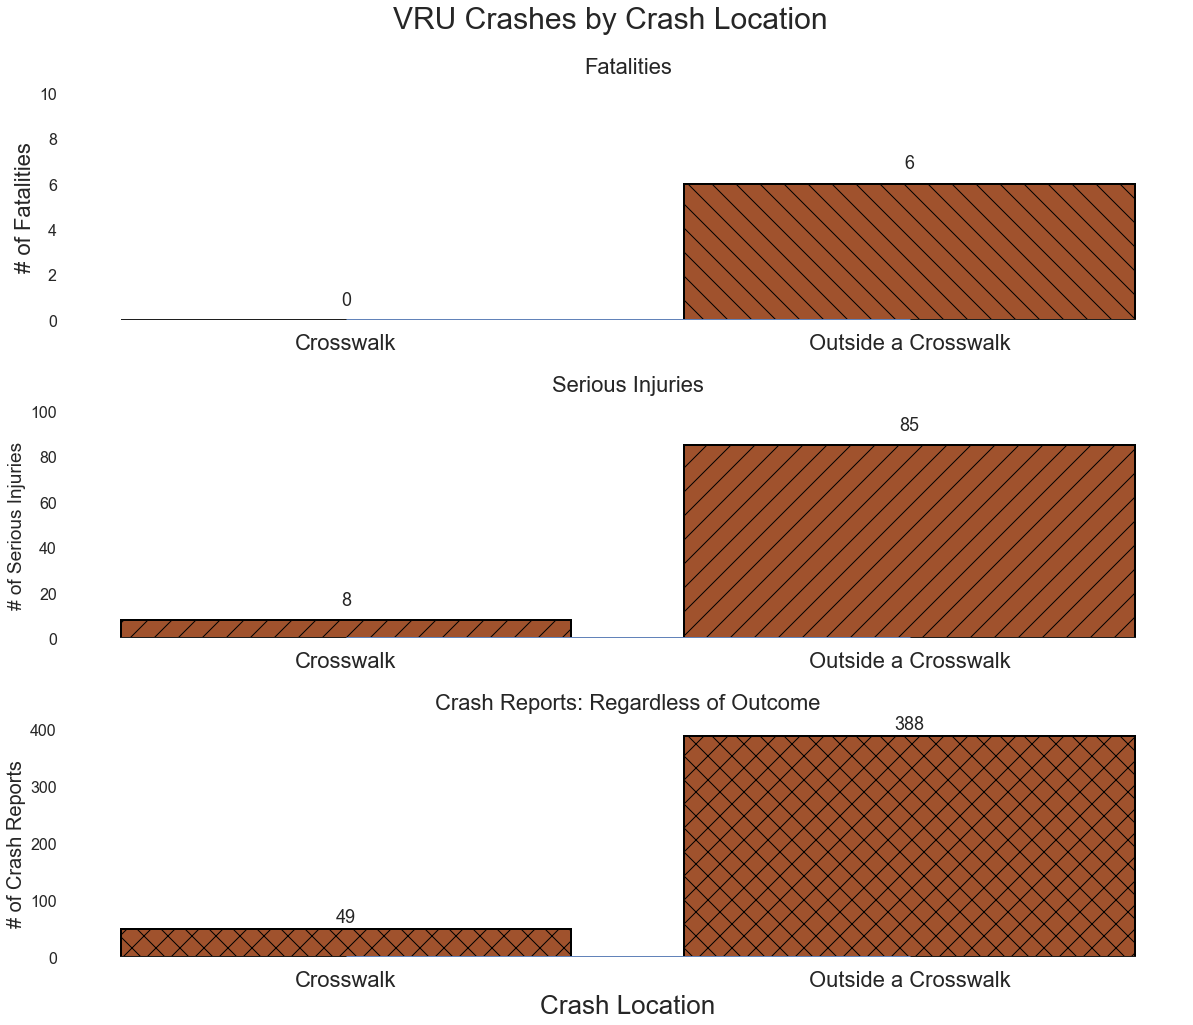

In [49]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
fig.suptitle('VRU Crashes by Crash Location', fontsize=30)

# subplot data
ax[0].bar(crosswalks, vru_crosswalk_fatalities, hatch = "\\", color = 'sienna', edgecolor = "black", linewidth=2)
ax[1].bar(crosswalks, vru_crosswalk_serious_injuries, hatch = "/", color = 'sienna', edgecolor = "black", linewidth=2)
ax[2].bar(crosswalks, vru_crosswalk_crashes, hatch = "x", color = 'sienna', edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 10])
ax[0].hlines(0, xmin = 0, xmax = 1, linewidth = 3)
ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=22)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 100])
ax[1].hlines(0, xmin = 0, xmax = 1, linewidth = 3)
ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=22)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("Crash Reports: Regardless of Outcome",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 400])
ax[2].hlines(0, xmin = 0, xmax = 1, linewidth = 3)
ax[2].set_xlabel('Crash Location',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=22)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Figure 5: Wildlife Crashes By Speed Limit

In [50]:
speed_list = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]
speed_columns = ['5_mph', '10_mph', '15_mph', '20_mph', '25_mph','30_mph', '35_mph', '40_mph', '45_mph', '50_mph', '55_mph', '60_mph','65_mph', '70_mph', '75_mph']
animal = analysis_2022.loc[analysis_2022['Involving Animal']==1]
animal_inj_or_fatal = animal.loc[animal['Injury or Fatal']==1]
animal_fatalities = []
animal_serious_injuries = []
animal_crashes = []

for i in speed_columns:
    num_animal_fatalities = animal.loc[animal[i]==1]['Num_Fatalities'].sum()
    animal_fatalities.append(num_animal_fatalities)
    num_animal_serious_injuries = animal.loc[animal[i]==1]['Incapacitating Injury'].sum()
    animal_serious_injuries.append(num_animal_serious_injuries)    
    num_animal_crashes = animal.loc[animal[i]==1].shape[0]
    #num_animal_crashes = animal_inj_or_fatal.loc[animal_inj_or_fatal[i]==1].shape[0]
    animal_crashes.append(num_animal_crashes)

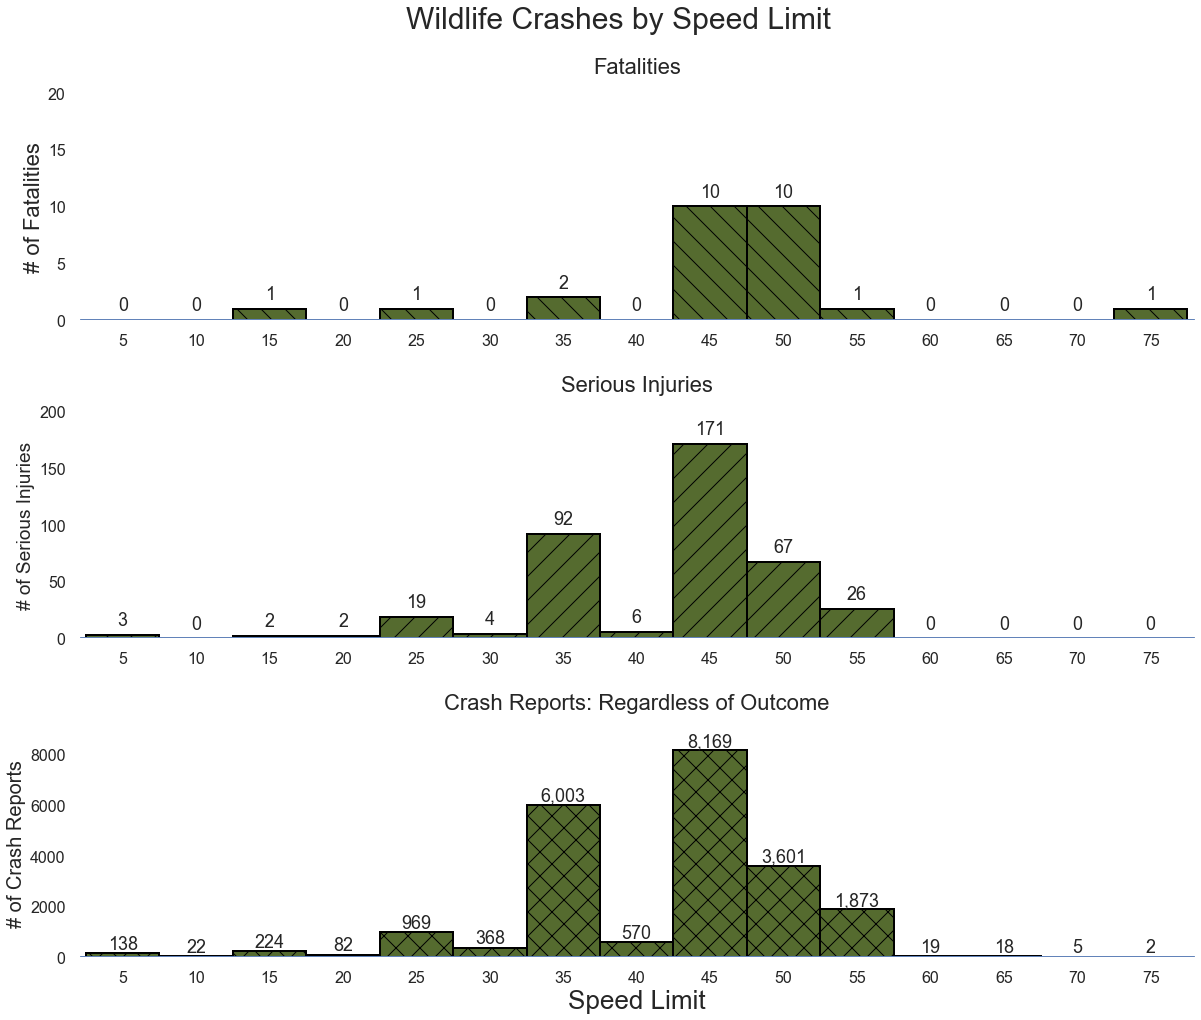

In [51]:
# set up main figure with three subplots
plt.style.use('seaborn')
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig, ax = plt.subplots(3,1,figsize=(20,15))
tick_spacing = 5
fig.suptitle('Wildlife Crashes by Speed Limit', fontsize=30)

# subplot data
ax[0].bar(speed_list, animal_fatalities, width = 5, hatch = "\\", color = 'darkolivegreen', edgecolor = "black", linewidth=2)
ax[1].bar(speed_list, animal_serious_injuries, width = 5, hatch = "/", color = 'darkolivegreen', edgecolor = "black", linewidth=2)
ax[2].bar(speed_list, animal_crashes, width = 5, hatch = "x", color = 'darkolivegreen', edgecolor = "black", linewidth=2)

# annotate all plots with bar totals
rects = ax[0].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[0].text(rect.get_x() + rect.get_width() / 2, height + 0.5, label, ha="center", va="bottom",fontsize=18)

rects = ax[1].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[1].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

rects = ax[2].patches
labels = [f"label{i}" for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    label = '{:,}'.format(int(height))
    ax[2].text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",fontsize=18)

# format each subplot
ax[0].set_title("Fatalities",fontsize= 22, pad = 20)
ax[0].set_ylim([0, 20])
ax[0].set_xlim([2, 78])
ax[0].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[0].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[0].set_ylabel("# of Fatalities", fontsize = 22)#ylabel
ax[0].tick_params(axis='x', which='major', labelsize=16)
ax[0].tick_params(axis='y', which='major', labelsize=16)
ax[0].tick_params(axis='both', which='minor', labelsize=8)

ax[1].set_title("Serious Injuries",fontsize= 22, pad = 20)
ax[1].set_ylim([0, 200])
ax[1].set_xlim([2, 78])
ax[1].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[1].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[1].set_ylabel("# of Serious Injuries", fontsize = 19)#ylabel
ax[1].tick_params(axis='x', which='major', labelsize=16)
ax[1].tick_params(axis='y', which='major', labelsize=16)
ax[1].tick_params(axis='both', which='minor', labelsize=8)

ax[2].set_title("Crash Reports: Regardless of Outcome",fontsize= 22, pad = 20)
ax[2].set_ylim([0, 9000])
ax[2].set_xlim([2, 78])
ax[2].hlines(0, xmin = 0, xmax = 78, linewidth = 3)
ax[2].xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax[2].set_xlabel('Speed Limit',fontsize = 26) #xlabel
ax[2].set_ylabel("# of Crash Reports", fontsize = 20)#ylabel
ax[2].tick_params(axis='x', which='major', labelsize=16)
ax[2].tick_params(axis='y', which='major', labelsize=16)
ax[2].tick_params(axis='both', which='minor', labelsize=8)

# set the spacing between subplots
plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

plt.show()

## Data Quality Figures

In [52]:
cds_dropped = pd.read_csv(".//Data//Output Data//CDS_dropped_crashes.csv")
cds_dropped

,Year,Crashes
0,1994.0,4
1,1997.0,15
2,2001.0,59
3,2003.0,129
4,2005.0,119
5,2006.0,98
6,2007.0,76
7,2008.0,54
8,2009.0,54
9,2010.0,72


In [53]:
imars_dropped = pd.read_csv(".//Data//Output Data//IMARS_dropped_crashes.csv")
imars_dropped

,Year,Crashes
0,2012,84
1,2013,317
2,2014,21
3,2015,13
4,2016,791
5,2017,841
6,2018,157
7,2019,46
8,2020,35
9,2021,35


In [54]:
all_dropped = cds_dropped.merge(imars_dropped, how='outer', on='Year').fillna(0)
all_dropped

,Year,Crashes_x,Crashes_y
0,1994.0,4.0,0.0
1,1997.0,15.0,0.0
2,2001.0,59.0,0.0
3,2003.0,129.0,0.0
4,2005.0,119.0,0.0
5,2006.0,98.0,0.0
6,2007.0,76.0,0.0
7,2008.0,54.0,0.0
8,2009.0,54.0,0.0
9,2010.0,72.0,0.0


In [55]:
cds_all = pd.read_csv(".//Data//Output Data//CDS_all_crashes_annual.csv")
imars_all = pd.read_csv(".//Data//Output Data//IMARS_all_crashes_annual.csv")
all_crashes = cds_all.merge(imars_all, how='outer', on='Year').fillna(0)
all_crashes

,Year,Crashes_x,Crashes_y
0,1920.0,1.0,0.0
1,1930.0,1.0,0.0
2,1931.0,1.0,0.0
3,1940.0,1.0,0.0
4,1944.0,1.0,0.0
5,1965.0,1.0,0.0
6,1967.0,1.0,0.0
7,1982.0,1.0,0.0
8,1988.0,2.0,0.0
9,1989.0,6843.0,0.0


In [56]:
all_crashes = all_crashes.sort_values('Year')
all_crashes

,Year,Crashes_x,Crashes_y
0,1920.0,1.0,0.0
1,1930.0,1.0,0.0
2,1931.0,1.0,0.0
3,1940.0,1.0,0.0
4,1944.0,1.0,0.0
5,1965.0,1.0,0.0
6,1967.0,1.0,0.0
7,1982.0,1.0,0.0
8,1988.0,2.0,0.0
9,1989.0,6843.0,0.0


## Figure 6: Dropped Crash Reports by Year

In [57]:
# NOTE: table containing data related to dropped crash reports from each dataset was created manually based on analysis in 
# respective IMARS and CDS 2022 cleaning codes

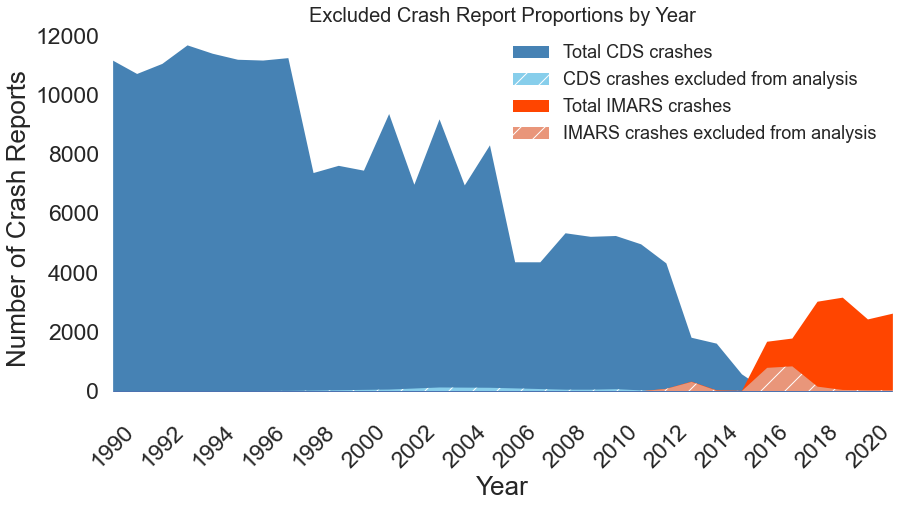

In [58]:
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Excluded Crash Report Proportions by Year', fontsize=20)
ax.fill_between(all_crashes['Year'], all_crashes['Crashes_x'], label = 'Total CDS crashes', facecolor = "steelblue")
ax.fill_between(all_dropped['Year'], all_dropped['Crashes_x'], hatch = '/', label = 'CDS crashes excluded from analysis', facecolor = "skyblue")
ax.fill_between(all_crashes['Year'], all_crashes['Crashes_y'], label = 'Total IMARS crashes', facecolor = "orangered")
ax.fill_between(all_dropped['Year'], all_dropped['Crashes_y'], hatch = '/', label = 'IMARS crashes excluded from analysis', facecolor = "darksalmon")

legend = plt.legend(frameon = 2,fontsize=18)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2021])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 1)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Crash Reports", fontsize=26)

plt.show()

In [59]:
len(analysis_2022.loc[analysis_2022['LATITUDE'].isnull()==True])/len(analysis_2022.LATITUDE.isnull()==False)

0.8224358633876879

In [60]:
df_year_origin_coords =analysis_2022.loc[analysis_2022['LATITUDE'].isnull()==False]
df_year_origin_coords

,INCID_NO,NUM_OCC,5_mph,10_mph,15_mph,20_mph,25_mph,30_mph,35_mph,40_mph,...,OtherDomestic,Involving Animal,LATITUDE,LONGITUDE,Park,RGN,CRASH_DATE,CRASH_TIME,CRASH_YEAR,database
4,ABLI140610163500,1,0,0,0,0,0,0,0,0,...,0,0,38.912050,-76.934120,ABLI,SER,6/10/2014,1635,2014.0,CDS
348,ACAD090421120000,14,0,0,0,0,0,0,1,0,...,0,0,44.368910,-68.238560,ACAD,NER,4/21/2009,1200,2009.0,CDS
1617,ANTI150711111500,1,0,0,0,0,0,0,0,0,...,0,0,39.405180,-77.751841,ANTI,NCR,7/11/2015,1115,2015.0,CDS
1788,ARCH150508151000,6,0,0,0,0,0,1,0,0,...,0,0,38.623760,-109.596920,ARCH,IMR,5/8/2015,1510,2015.0,CDS
1791,ARCH150623170000,2,0,0,0,0,0,1,0,0,...,0,0,38.622790,-109.601340,ARCH,IMR,6/23/2015,1700,2015.0,CDS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207012,NP20161055,1,0,0,0,0,0,0,0,0,...,0,1,36.605187,-83.695478,CUGA,SER,11/22/2020,630,2020.0,IMARS
207013,PP20078894,1,0,0,0,0,0,0,0,0,...,0,0,38.940841,-77.133592,GWMP,NCR,12/17/2020,955,2020.0,IMARS
207014,NP21020906,1,0,0,0,0,0,0,0,0,...,0,0,35.671851,-83.580464,GRSM,SER,3/11/2021,1730,2021.0,IMARS
207015,NP21313358,1,0,0,0,0,0,0,0,0,...,0,0,41.816467,-124.093035,REDW,PWR,12/20/2021,1330,2021.0,IMARS


In [61]:
analysis_2022['ones'] = 1
df_year_origin=analysis_2022.groupby(['database', "CRASH_YEAR"]).sum()
df_year_origin=df_year_origin.reset_index()
df_year_origin = df_year_origin.loc[df_year_origin['CRASH_YEAR']<2022]
df_year_origin = df_year_origin.loc[df_year_origin['CRASH_YEAR']>1988]

df_year_origin_coords =analysis_2022.loc[analysis_2022['LATITUDE'].notnull()]
df_year_origin_coords = df_year_origin_coords.groupby(['database', "CRASH_YEAR"]).sum()
df_year_origin_coords=df_year_origin_coords.reset_index()
df_year_origin_coords = df_year_origin_coords.loc[df_year_origin_coords['CRASH_YEAR']<2022]
df_year_origin_coords = df_year_origin_coords.loc[df_year_origin_coords['CRASH_YEAR']>1988]

#df_year_origin=df_year_origin[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
#df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)

In [62]:
cds_year = df_year_origin.loc[df_year_origin['database']=='CDS']
imars_year = df_year_origin.loc[df_year_origin['database']=='IMARS']
cds_year_coords = df_year_origin_coords.loc[df_year_origin_coords['database']=='CDS']
imars_year_coords = df_year_origin_coords.loc[df_year_origin_coords['database']=='IMARS']

In [7]:
df = pd.read_excel(".//Data//Output Data//Final Coordinate Stats No AKR.xlsx")
df.columns=["Park","Region","Within Boundary","<1mi Out","1-10mi Out","10-100mi Out",">100mi Out","No Coordinates","Total Crashes"]
df = df.sort_values(by="Total Crashes", ascending=False)
top10 = pd.DataFrame(df.head(10)) # 10 parks with the most crashes servicewide 
top10

,Park,Region,Within Boundary,<1mi Out,1-10mi Out,10-100mi Out,>100mi Out,No Coordinates,Total Crashes
279,NACA,NCR,602,623,36,97,25,171,1554
416,YOSE,PWR,430,11,6,4,14,853,1318
415,YELL,IMR,499,5,7,0,76,600,1187
176,GRSM,SER,683,19,2,7,49,364,1124
36,BLRI,SER,531,19,7,19,7,389,972
281,NATR,SER,455,21,22,61,52,308,919
182,GWMP,NCR,291,91,7,5,3,24,421
171,GRCA,IMR,101,1,2,1,18,193,316
235,LAKE,PWR,213,0,5,1,6,77,302
107,DEWA,NER,129,6,0,2,3,95,235


In [8]:
# determine proportion of total crashes for plotting 100% stacked bars
top10['Within Boundary'] = top10['Within Boundary']/top10['Total Crashes']
top10["<1mi Out"] = top10["<1mi Out"]/top10['Total Crashes']
top10["1-10mi Out"] = top10["1-10mi Out"]/top10['Total Crashes']
top10["10-100mi Out"] = top10["10-100mi Out"]/top10['Total Crashes']
top10[">100mi Out"] = top10[">100mi Out"]/top10['Total Crashes']
top10["No Coordinates"] = top10["No Coordinates"]/top10['Total Crashes']

# check that each row sums to 1
top10['sum'] = top10['Within Boundary'] + top10["<1mi Out"] + top10["1-10mi Out"] + top10["10-100mi Out"] + top10[">100mi Out"] + top10["No Coordinates"]
top10

,Park,Region,Within Boundary,<1mi Out,1-10mi Out,10-100mi Out,>100mi Out,No Coordinates,Total Crashes,sum
279,NACA,NCR,0.387387,0.400901,0.023166,0.062420,0.016088,0.110039,1554,1.0
416,YOSE,PWR,0.326252,0.008346,0.004552,0.003035,0.010622,0.647193,1318,1.0
415,YELL,IMR,0.420388,0.004212,0.005897,0.000000,0.064027,0.505476,1187,1.0
176,GRSM,SER,0.607651,0.016904,0.001779,0.006228,0.043594,0.323843,1124,1.0
36,BLRI,SER,0.546296,0.019547,0.007202,0.019547,0.007202,0.400206,972,1.0
281,NATR,SER,0.495103,0.022851,0.023939,0.066376,0.056583,0.335147,919,1.0
182,GWMP,NCR,0.691211,0.216152,0.016627,0.011876,0.007126,0.057007,421,1.0
171,GRCA,IMR,0.319620,0.003165,0.006329,0.003165,0.056962,0.610759,316,1.0
235,LAKE,PWR,0.705298,0.000000,0.016556,0.003311,0.019868,0.254967,302,1.0
107,DEWA,NER,0.548936,0.025532,0.000000,0.008511,0.012766,0.404255,235,1.0


In [9]:
top10_slim = top10.drop(columns=['Park','Region','Total Crashes','sum'])

## Figure 7: Serious Injury Crash Data Quality

In [66]:
max(cds_year['Incapacitating Injury'])

676

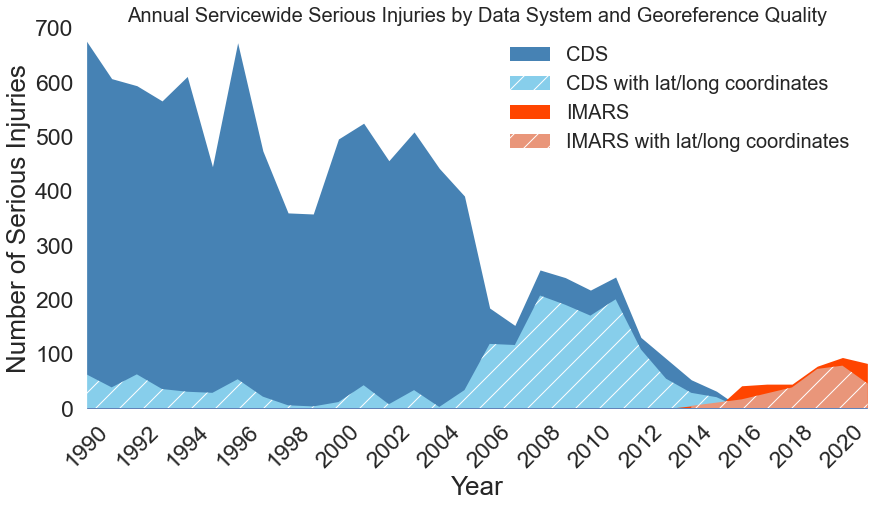

In [67]:
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Annual Servicewide Serious Injuries by Data System and Georeference Quality', fontsize=20)
ax.fill_between(cds_year["CRASH_YEAR"], cds_year['Incapacitating Injury'], label = 'CDS', facecolor = "steelblue")
ax.fill_between(cds_year_coords["CRASH_YEAR"], cds_year_coords['Incapacitating Injury'], label = 'CDS with lat/long coordinates', 
       hatch = '/', facecolor = "skyblue")
ax.fill_between(imars_year["CRASH_YEAR"], imars_year['Incapacitating Injury'], label = 'IMARS', facecolor = "orangered")
ax.fill_between(imars_year_coords["CRASH_YEAR"], imars_year_coords['Incapacitating Injury'], label = 'IMARS with lat/long coordinates', 
        hatch = "/", facecolor = "darksalmon")

legend = plt.legend(frameon = 2,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2021])
plt.ylim([0,700])
ax.set_yticks([0,100,200,300,400,500,600,700])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Serious Injuries", fontsize=26)

plt.show()

## Figure 8: Fatal Crash Data Quality

In [68]:
max(cds_year['Num_Fatalities'])

74.0

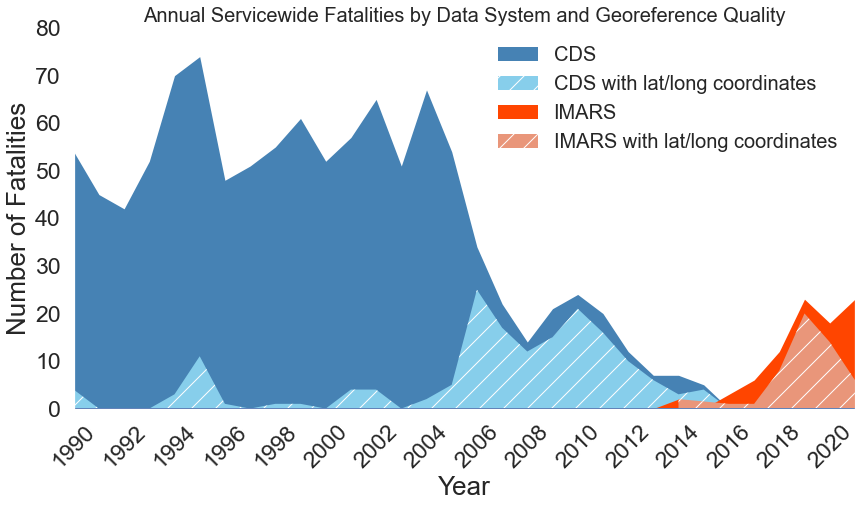

In [69]:
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Annual Servicewide Fatalities by Data System and Georeference Quality', fontsize=20)
ax.fill_between(cds_year["CRASH_YEAR"], cds_year['Num_Fatalities'], label = 'CDS', facecolor = "steelblue")
ax.fill_between(cds_year_coords["CRASH_YEAR"], cds_year_coords['Num_Fatalities'], label = 'CDS with lat/long coordinates', 
       hatch = '/', facecolor = "skyblue")
ax.fill_between(imars_year["CRASH_YEAR"], imars_year['Num_Fatalities'], label = 'IMARS', facecolor = "orangered")
ax.fill_between(imars_year_coords["CRASH_YEAR"], imars_year_coords['Num_Fatalities'], label = 'IMARS with lat/long coordinates', 
        hatch = "/", facecolor = "darksalmon")

legend = plt.legend(frameon = 2,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2021])
plt.ylim([0,80])
ax.set_yticks([0,10,20,30,40,50,60,70,80])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2021, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Fatalities", fontsize=26)

plt.show()

## Figure 9: IMARS Geolocation Quality

<ipython-input-10-1760841f6413>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.0%}'.format(y) for y in y_vals], fontsize=15)


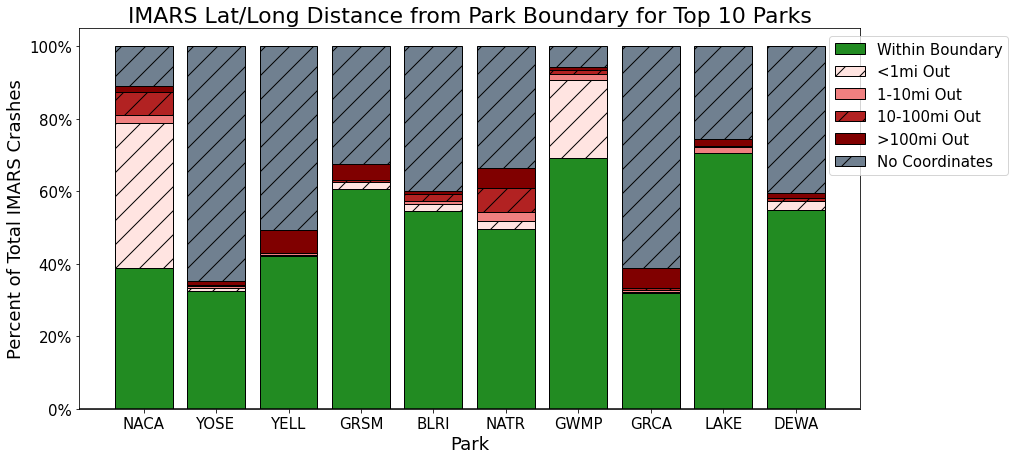

In [10]:
import matplotlib.patches as mpatches

fig,ax = plt.subplots(1,1, figsize=(14, 7))
# Each column will take the sum of all columns before it as its base
bottom_list = []

for i in top10_slim.columns:
    b = list(top10_slim.loc[:, top10_slim.columns[0]: i].sum(axis=1))
    bottom_list.append(b)

x_ax = top10['Park']
patterns = ['','/','','/','','/'] # define hatch for each bin
colorlist = ['forestgreen','mistyrose', 'lightcoral', 'firebrick', 'maroon', 'slategrey'] # define color for each bin
for i, v in enumerate(top10_slim.columns):
    if i == 0:
        # First column is at the bottom of the chart so bottom is 0 and doesn't need to be specified.
        plt.bar(x_ax, top10_slim[v], hatch=patterns[i], color=colorlist[i], edgecolor='k')
    else:
        plt.bar(x_ax, top10_slim[v], bottom=bottom_list[i - 1], hatch=patterns[i], color=colorlist[i], edgecolor='k')

ax.tick_params(axis='x', which='major', labelsize=15)
y_vals = ax.get_yticks()
ax.set_yticklabels(['{:.0%}'.format(y) for y in y_vals], fontsize=15)
ax.set_ylabel("Percent of Total IMARS Crashes", fontsize=18)
ax.set_xlabel("Park", fontsize=18)
ax.axhline(y=0, color='k')

within_patch = mpatches.Patch(hatch=patterns[0], facecolor=colorlist[0], edgecolor="black", label=top10_slim.columns[0])
one_mile_patch = mpatches.Patch(hatch=patterns[1], facecolor=colorlist[1], edgecolor="black", label=top10_slim.columns[1])
ten_mile_patch = mpatches.Patch(hatch=patterns[2], facecolor=colorlist[2], edgecolor="black", label=top10_slim.columns[2])
hundred_mile_patch = mpatches.Patch(hatch=patterns[3], facecolor=colorlist[3], edgecolor="black", label=top10_slim.columns[3])
over_hundred_mile_patch = mpatches.Patch(hatch=patterns[4], facecolor=colorlist[4], edgecolor="black", label=top10_slim.columns[4])
no_coords_patch = mpatches.Patch(hatch=patterns[5], facecolor=colorlist[5], edgecolor="black", label=top10_slim.columns[5])
ax.legend(loc="upper left", frameon=1,bbox_to_anchor=(0.95, 1), prop={'size': 15}, handles = [within_patch, one_mile_patch, ten_mile_patch, hundred_mile_patch, over_hundred_mile_patch, no_coords_patch])
ax.set_title('IMARS Lat/Long Distance from Park Boundary for Top 10 Parks', fontsize=22)

plt.show()